## Feature Analysis (Numerical Features)

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
house_df = pd.read_csv('Housing.csv')

for i, ele in enumerate(house_df):
    print(f'{i}: {ele}')

0: price
1: area
2: bedrooms
3: bathrooms
4: stories
5: mainroad
6: guestroom
7: basement
8: hotwaterheating
9: airconditioning
10: parking
11: prefarea
12: furnishingstatus


In [30]:
house_df.head(10)

house_df = house_df.drop(columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'])

In [31]:
# # Binary data encoding 
# bi_mapping = {"no" : 0, "yes" : 1}
# # 
# house_df['hotwaterheating_encoded'] = house_df['hotwaterheating'].map(bi_mapping)
# house_df['airconditioning_encoded'] = house_df['airconditioning'].map(bi_mapping)

# # house_df['mainroad_ecoded'] = house_df['mainroad'].map(bi_mapping) 
# # house_df['guestroom_ecoded'] = house_df['guestroom'].map(bi_mapping) 
# # house_df['basement_ecoded'] = house_df['basement'].map(bi_mapping)
# house_df['prefarea_ecoded'] = house_df['prefarea'].map(bi_mapping)

In [32]:
# furnishingstatus_mapping = {"unfurnished" : 0, "semi-furnished" : 1, "furnished" : 2}

# house_df['furnishingstatus_encoded'] = house_df['furnishingstatus'].map(furnishingstatus_mapping)

In [33]:
# house_df = house_df.drop(columns=['hotwaterheating','airconditioning','furnishingstatus'])
# house_df = house_df.drop(columns=['mainroad', 'guestroom', 'basement', 'prefarea'])
# # house_df.head(5)

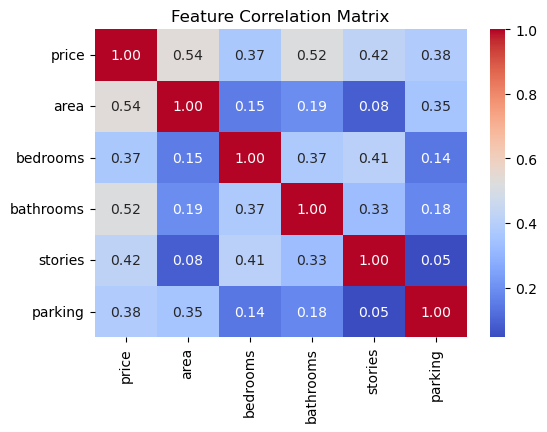

Highly correlated features with target: ['area', 'bathrooms']


In [34]:
# Compute Pearson correlation
corr_matrix = house_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Selecting highly correlated features (absolute value > 0.7)
threshold = 0.5
high_corr_features = corr_matrix[abs(corr_matrix['price']) > threshold]['price'].index.tolist()
high_corr_features.remove('price')  # Remove the target itself
print("Highly correlated features with target:", high_corr_features)
